In [2]:
# import needed libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
#import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.datasets import make_blobs
from statsmodels.api import OLS

In [3]:
# opening concord data and save related columns in a dataframe
with open(r'../../data/tidy/concord_streets_data.csv') as concord:
    df_concord=pd.read_csv(concord)
    df_concord_variable=df_concord.filter(items=['total cost','density(#parcel/ft)','1 phase','SAND_mean','CLAY_mean','BLD_AREA/length','TOTAL_VAL/length','SAND_max','CLAY_max','log_density','SAND/CLAY','log_CLAY'])
    y = df_concord_variable['total cost']

In [4]:
#def a function to implement single variable linear regression:
def estimate_coef(x1, y):
    # number of observations/points
    n = np.size(x1)
 
    # mean of x1 and y vector
    m_x1 = np.mean(x1)
    m_y = np.mean(y)
 
    # calculating cross-deviation and deviation about x1
    SS_x1y = np.sum(y*x1) - n*m_y*m_x1
    SS_x1x1 = np.sum(x1*x1) - n*m_x1*m_x1
 
    # calculating regression coefficients
    b_1 = SS_x1y / SS_x1x1
    b_0 = m_y - b_1*m_x1
 
    return (b_0, b_1)
 
def plot_regression_line(x1, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x1, y, color = "m",
               marker = "o", s = 30)
 
    # predicted response vector
    y_pred = b[0] + b[1]*x1
 
    # plotting the regression line
    plt.plot(x1, y_pred, color = "g")
 
    # putting labels
    plt.xlabel('x1')
    plt.ylabel('y')
 
    # function to show plot
    plt.show()
 
def implement_single_variable_linear_regression(x1):
 
    # estimating coefficients
    b = estimate_coef(x1, y)
    print("Estimated coefficients:\nb_0 = {}  \
          \nb_1 = {}".format(b[0], b[1]))
 
    # plotting regression line
    plot_regression_line(x1, y, b)
 
if __name__ == "__implement_single_variable_linear_regression__":
    implement_single_variable_linear_regression(x1)

Estimated coefficients:
b_0 = 156.28500977640965            
b_1 = -28.920821395920335


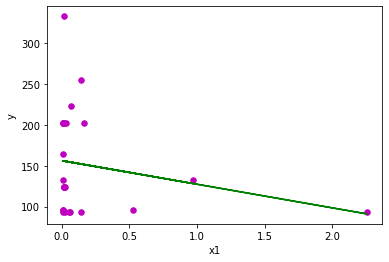

In [5]:
#implement single variable linear regression for density(#parcel/ft)
implement_single_variable_linear_regression(x1= df_concord_variable['density(#parcel/ft)'])

Estimated coefficients:
b_0 = 145.95860419328443            
b_1 = 0.0835126157902222


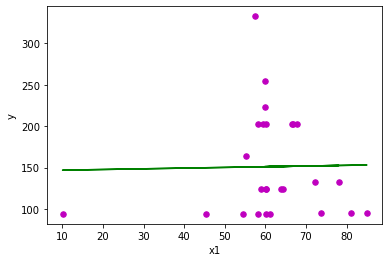

In [6]:
#implement single variable linear regression for SAND_mean
implement_single_variable_linear_regression(x1 = df_concord_variable['SAND_mean'])

Estimated coefficients:
b_0 = 177.426            
b_1 = -62.246909090909114


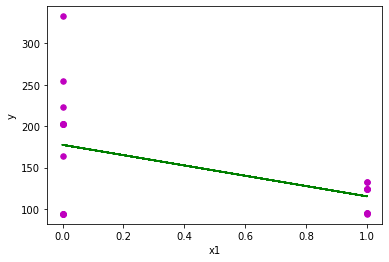

In [7]:
#implement single variable linear regression for 1 phase
implement_single_variable_linear_regression(x1 = df_concord_variable['1 phase'])

In [8]:
#def a function to implement multi variable linear regression:
def implement_multivariable_regression(X):
    #Splitting the dataset
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)
    #Fitting the Multiple Linear Regression model
    mlr = LinearRegression()  
    mlr.fit(X, y)
    #Intercept and Coefficient
    print("Intercept: ", mlr.intercept_)
    print("Coefficients:", list(zip(X, mlr.coef_)))
    #Prediction of test set
    y_pred_mlr= mlr.predict(x_test)
    #Predicted values
    print("Prediction for test set: {}".format(y_pred_mlr))
    #Actual value and the predicted value
    mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
    #slr_diff.head()
    #Model Evaluation
    from sklearn import metrics
    meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
    meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
    rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
    print('R squared: {:.2f}'.format(mlr.score(X,y)*100))
    print('Mean Absolute Error:', meanAbErr)
    print('Mean Square Error:', meanSqErr)
    print('Root Mean Square Error:', rootMeanSqErr)

In [9]:
#implement multi variable linear regression for density, 1 phase and SAND_mean
implement_multivariable_regression(X = df_concord_variable[['density(#parcel/ft)','1 phase', 'SAND_mean']])

Intercept:  113.49950728569426
Coefficients: [('density(#parcel/ft)', -34.830300841445876), ('1 phase', -76.98804934009596), ('SAND_mean', 1.2435156569310308)]
Prediction for test set: [ 90.97676587 185.33662126 137.15533812 187.981487   110.68797404
 190.63046484 197.2340236  185.47112943]
R squared: 37.13
Mean Absolute Error: 28.157480760857627
Mean Square Error: 1583.9719904117899
Root Mean Square Error: 39.79914559901745


In [10]:
#implement multi variable linear regression for density, 1 phase and CLAY_mean
implement_multivariable_regression(X = df_concord_variable[['density(#parcel/ft)','1 phase', 'CLAY_mean']])

Intercept:  156.54476173372706
Coefficients: [('density(#parcel/ft)', -32.75614949803049), ('1 phase', -59.05309473324798), ('CLAY_mean', 6.4499823403555965)]
Prediction for test set: [109.16484995 186.88321924 108.8618391  191.13643984 131.79607191
 178.78742027 182.51193002 178.54344348]
R squared: 32.83
Mean Absolute Error: 29.736648472125122
Mean Square Error: 1640.8087219691015
Root Mean Square Error: 40.50689721478432


In [11]:
#implement multi variable linear regression for BLD_AREA/length, 1 phase and SAND_mean
implement_multivariable_regression(X = df_concord_variable[['BLD_AREA/length','1 phase', 'SAND_mean']])

Intercept:  116.69400552544124
Coefficients: [('BLD_AREA/length', -0.006617028957576138), ('1 phase', -74.9467943849727), ('SAND_mean', 1.1711729903342547)]
Prediction for test set: [ 93.3569406  184.23803804 136.32627482 186.17244278 111.61203334
 190.3246161  196.05008132 184.62473992]
R squared: 35.73
Mean Absolute Error: 27.844033535583407
Mean Square Error: 1544.8956587600883
Root Mean Square Error: 39.305160714085474


In [12]:
#implement multi variable linear regression for BLD_AREA/length, 1 phase and CLAY_mean
implement_multivariable_regression(X = df_concord_variable[['BLD_AREA/length','1 phase', 'CLAY_mean']])

Intercept:  157.8193637047039
Coefficients: [('BLD_AREA/length', -0.006401223022299533), ('1 phase', -58.204263101528966), ('CLAY_mean', 5.982929062294761)]
Prediction for test set: [110.66865445 185.83340567 109.94913349 189.24776898 131.41728938
 179.18306895 182.35669126 178.26836238]
R squared: 31.83
Mean Absolute Error: 29.91266475531505
Mean Square Error: 1610.312136621202
Root Mean Square Error: 40.12869467876076


In [13]:
X=df_concord_variable[['density(#parcel/ft)','1 phase', 'CLAY_mean']]
y=df_concord_variable['total cost']
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             total cost   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     3.584
Date:                Tue, 21 Dec 2021   Prob (F-statistic):             0.0301
Time:                        11:15:28   Log-Likelihood:                -138.81
No. Observations:                  26   AIC:                             285.6
Df Residuals:                      22   BIC:                             290.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 156.5448     37.937      4.126      0.000      77.869     235.221
density(#parcel/ft)   -32.7561     23.271     -1.408      0.173     -81.018      15.506
1 phase               -59.0531     22.603     -2.613      0.016    -105.929     -12.178
CLAY_mean               6.4500      8.224      0.784      0.441     -10.606      23.506
==============================================================================
Omnibus:                        5.852   Durbin-Watson:                   0.970
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                4.643
Skew:                           0.512   Prob(JB):                       0.0981
Kurtosis:                       4.800   Cond. No.                         16.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
X=df_concord_variable[['density(#parcel/ft)','1 phase', 'CLAY_mean']]
y=df_concord_variable['total cost']
#X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
print(est.summary())

                                 OLS Regression Results                                
Dep. Variable:             total cost   R-squared (uncentered):                   0.831
Model:                            OLS   Adj. R-squared (uncentered):              0.809
Method:                 Least Squares   F-statistic:                              37.62
Date:                Tue, 21 Dec 2021   Prob (F-statistic):                    4.89e-09
Time:                        11:29:51   Log-Likelihood:                         -146.26
No. Observations:                  26   AIC:                                      298.5
Df Residuals:                      23   BIC:                                      302.3
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

In [29]:
X=df_concord_variable[['density(#parcel/ft)','1 phase', 'SAND_mean']]
y=df_concord_variable['total cost']
#X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
print(est.summary())

                                 OLS Regression Results                                
Dep. Variable:             total cost   R-squared (uncentered):                   0.890
Model:                            OLS   Adj. R-squared (uncentered):              0.875
Method:                 Least Squares   F-statistic:                              61.88
Date:                Tue, 21 Dec 2021   Prob (F-statistic):                    3.63e-11
Time:                        11:29:34   Log-Likelihood:                         -140.68
No. Observations:                  26   AIC:                                      287.4
Df Residuals:                      23   BIC:                                      291.1
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

In [28]:
X=df_concord_variable[['BLD_AREA/length','1 phase', 'SAND_mean']]
y=df_concord_variable['total cost']
#X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
print(est.summary())

                                 OLS Regression Results                                
Dep. Variable:             total cost   R-squared (uncentered):                   0.887
Model:                            OLS   Adj. R-squared (uncentered):              0.872
Method:                 Least Squares   F-statistic:                              59.98
Date:                Tue, 21 Dec 2021   Prob (F-statistic):                    4.99e-11
Time:                        11:29:15   Log-Likelihood:                         -141.04
No. Observations:                  26   AIC:                                      288.1
Df Residuals:                      23   BIC:                                      291.9
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [27]:
X=df_concord_variable[['BLD_AREA/length','1 phase', 'CLAY_mean']]
y=df_concord_variable['total cost']
#X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
print(est.summary())

                                 OLS Regression Results                                
Dep. Variable:             total cost   R-squared (uncentered):                   0.829
Model:                            OLS   Adj. R-squared (uncentered):              0.806
Method:                 Least Squares   F-statistic:                              37.10
Date:                Tue, 21 Dec 2021   Prob (F-statistic):                    5.57e-09
Time:                        11:29:03   Log-Likelihood:                         -146.41
No. Observations:                  26   AIC:                                      298.8
Df Residuals:                      23   BIC:                                      302.6
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [18]:
X=df_concord_variable[['density(#parcel/ft)','1 phase', 'SAND_max']]
y=df_concord_variable['total cost']
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:             total cost   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     3.861
Date:                Tue, 21 Dec 2021   Prob (F-statistic):             0.0233
Time:                        11:15:35   Log-Likelihood:                -138.48
No. Observations:                  26   AIC:                             285.0
Df Residuals:                      22   BIC:                             290.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 106.9303    

In [19]:
X=df_concord_variable[['density(#parcel/ft)','1 phase','log_CLAY']]
y=df_concord_variable['total cost']
#X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
print(est.summary())

                                 OLS Regression Results                                
Dep. Variable:             total cost   R-squared (uncentered):                   0.832
Model:                            OLS   Adj. R-squared (uncentered):              0.810
Method:                 Least Squares   F-statistic:                              37.98
Date:                Tue, 21 Dec 2021   Prob (F-statistic):                    4.47e-09
Time:                        11:15:38   Log-Likelihood:                         -146.16
No. Observations:                  26   AIC:                                      298.3
Df Residuals:                      23   BIC:                                      302.1
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

In [20]:
X=df_concord_variable[['density(#parcel/ft)','1 phase','log_CLAY']]
y=df_concord_variable['total cost']
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:             total cost   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     4.046
Date:                Tue, 21 Dec 2021   Prob (F-statistic):             0.0197
Time:                        11:15:46   Log-Likelihood:                -138.27
No. Observations:                  26   AIC:                             284.5
Df Residuals:                      22   BIC:                             289.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 145.4689    

In [21]:
X=df_concord_variable[['log_density','1 phase','log_CLAY']]
y=df_concord_variable['total cost']
#X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
print(est.summary())

                                 OLS Regression Results                                
Dep. Variable:             total cost   R-squared (uncentered):                   0.870
Model:                            OLS   Adj. R-squared (uncentered):              0.853
Method:                 Least Squares   F-statistic:                              51.12
Date:                Tue, 21 Dec 2021   Prob (F-statistic):                    2.48e-10
Time:                        11:15:48   Log-Likelihood:                         -142.87
No. Observations:                  26   AIC:                                      291.7
Df Residuals:                      23   BIC:                                      295.5
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [22]:
X=df_concord_variable[['log_density','1 phase','log_CLAY']]
y=df_concord_variable['total cost']
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:             total cost   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     3.449
Date:                Tue, 21 Dec 2021   Prob (F-statistic):             0.0341
Time:                        11:15:50   Log-Likelihood:                -138.97
No. Observations:                  26   AIC:                             285.9
Df Residuals:                      22   BIC:                             291.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         117.5917     42.392      2.774      

In [24]:
# opening concord data and save related columns in a dataframe
with open(r'../../data/tidy/concord_streets_data_without_outliers.csv') as concord:
    df_concord_without_outliers=pd.read_csv(concord)
    df_concord_without_outliers_variable=df_concord_without_outliers.filter(items=['total cost','density(#parcel/ft)','1 phase','SAND_mean','CLAY_mean','BLD_AREA/length','TOTAL_VAL/length','SAND_max','CLAY_max','log_density','SAND/CLAY','log_CLAY'])

In [37]:
X= df_concord_without_outliers_variable[['log_density','1 phase','SAND_max']]
y= df_concord_without_outliers_variable['total cost']
#X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
print(est.summary())

                                 OLS Regression Results                                
Dep. Variable:             total cost   R-squared (uncentered):                   0.904
Model:                            OLS   Adj. R-squared (uncentered):              0.890
Method:                 Least Squares   F-statistic:                              62.74
Date:                Tue, 21 Dec 2021   Prob (F-statistic):                    2.36e-10
Time:                        11:33:19   Log-Likelihood:                         -123.67
No. Observations:                  23   AIC:                                      253.3
Df Residuals:                      20   BIC:                                      256.8
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [ ]:
X= df_concord_without_outliers_variable[['log_density','1 phase','log_CLAY']]
y= df_concord_without_outliers_variable['total cost']
#X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
print(est.summary())

                                 OLS Regression Results                                
Dep. Variable:             total cost   R-squared (uncentered):                   0.827
Model:                            OLS   Adj. R-squared (uncentered):              0.810
Method:                 Least Squares   F-statistic:                              50.08
Date:                Tue, 21 Dec 2021   Prob (F-statistic):                    1.02e-08
Time:                        11:30:53   Log-Likelihood:                         -130.46
No. Observations:                  23   AIC:                                      264.9
Df Residuals:                      21   BIC:                                      267.2
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------